# Tutorial para cargar Santiago Chile a Geopandas

## Repositorio de Shape Files de Chile censo 2017
De este repo podrás descargar los shapefile con la información  de la latitud y longitud Chile. Nos interesa la región 13 ya que es la región en la que se encuentra Santiago, la ciudad de interés.

https://github.com/diegocaro/chile_census_2017_shapefiles/tree/master/R13


## Instalando Geopandas

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Cargando los Datos de Santiago Chile

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13


In [ ]:
%cd "/content/gdrive/MyDrive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13"
!ls

/content/gdrive/MyDrive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13
CALLES_PAIS_C17.CPG		  LOCALIDAD_C17.dbf
CALLES_PAIS_C17.dbf		  LOCALIDAD_C17.prj
CALLES_PAIS_C17.prj		  LOCALIDAD_C17.shp
CALLES_PAIS_C17.sbn		  LOCALIDAD_C17.shp.xml
CALLES_PAIS_C17.sbx		  LOCALIDAD_C17.shx
CALLES_PAIS_C17.shp		  MANZANA_ALDEA_C17.cpg
CALLES_PAIS_C17.shp.xml		  MANZANA_ALDEA_C17.dbf
CALLES_PAIS_C17.shx		  MANZANA_ALDEA_C17.prj
COMUNA_C17.cpg			  MANZANA_ALDEA_C17.shp
COMUNA_C17.dbf			  MANZANA_ALDEA_C17.shp.xml
COMUNA_C17.prj			  MANZANA_ALDEA_C17.shx
COMUNA_C17.shp			  MANZANA_IND_C17.cpg
COMUNA_C17.shp.xml		  MANZANA_IND_C17.dbf
COMUNA_C17.shx			  MANZANA_IND_C17.prj
DISTRITO_C17.cpg		  MANZANA_IND_C17.shp
DISTRITO_C17.dbf		  MANZANA_IND_C17.shp.xml
DISTRITO_C17.prj		  MANZANA_IND_C17.shx
DISTRITO_C17.shp		  MANZANA_SIN_INF_C17.cpg
DISTRITO_C17.shp.xml		  MANZANA_SIN_INF_C17.dbf
DISTRITO_C17.shx		

## Cargando Shape Files y Vector Maps

from  [Marcelo Rovai](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f),  follow link for full explanation:

> The shapefile is in fact a grouping of several files formatted to represent different aspects of geodata:
* .shp — shape format; the feature geometry itself.
* .shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly.
* .dbf — attribute format; columnar attributes for each shape, in dBase IV format.

> There are also several optional files in the shapefile format. The most significant of these is the .prj file which describes the coordinate system and projection information used.

> A vector map is a group of several files, with name.shp being the main one, where the geographic features are saved. It is important to remember that all other files as 'name.shx', ' name.dbf', etc., must be at same folder.



In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
gdf = gpd.read_file("COMUNA_C17.shp")
gdf.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,1.625330,0.066035,"POLYGON ((-70.61889 -33.73808, -70.61811 -33.7..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9..."


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      52 non-null     object  
 1   NOM_REGION  52 non-null     object  
 2   PROVINCIA   52 non-null     object  
 3   NOM_PROVIN  52 non-null     object  
 4   COMUNA      52 non-null     object  
 5   NOM_COMUNA  52 non-null     object  
 6   SHAPE_Leng  52 non-null     float64 
 7   SHAPE_Area  52 non-null     float64 
 8   geometry    52 non-null     geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 3.8+ KB


In [79]:
gdf.centroid.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-70.62710 -33.60435)
1    POINT (-70.75822 -33.86337)
2    POINT (-70.73907 -33.74753)
3    POINT (-70.85460 -33.42391)
4    POINT (-70.74412 -33.42223)
dtype: geometry

In [80]:
# gdf = gdf.to_crs(4326)  remapear a GPS, no es necesario
gdf["lon"] = gdf.centroid.x
gdf["lat"] = gdf.centroid.y

gdf[["lat","lon"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


,lat,lon
0,-33.604345,-70.627096
1,-33.863368,-70.758217
2,-33.747535,-70.739073
3,-33.423914,-70.854596
4,-33.422230,-70.744115


## Visualizar Santiago Chile

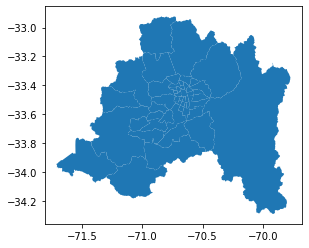

In [ ]:
gdf.plot()

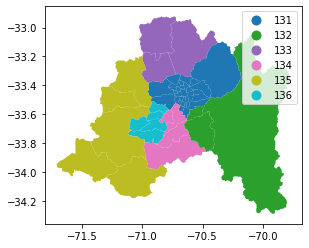

In [ ]:
gdf.plot("PROVINCIA", legend = True)

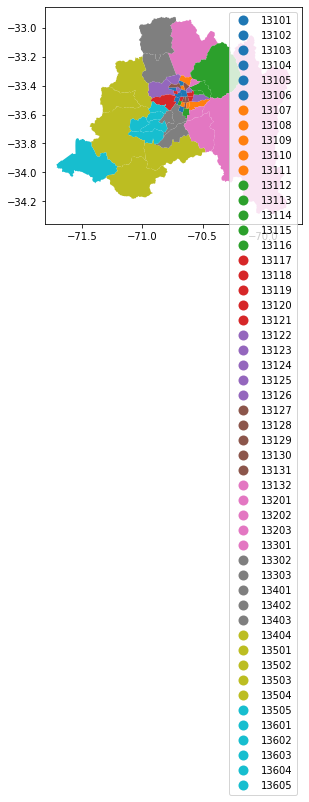

In [ ]:
gdf.plot("COMUNA", legend = True)

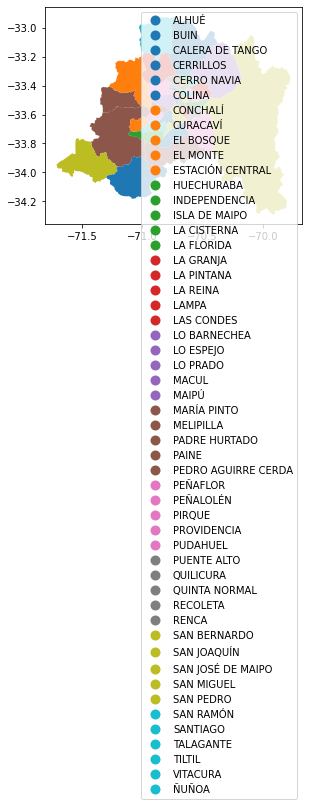

In [ ]:
gdf.plot("NOM_COMUNA", legend = True)

## Mapas interactivos

In [ ]:
! pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
gdf.explore("SHAPE_Area", legend = False)

## Juntando varios shapefiles

In [ ]:
import os
import pandas as pd

# solo las regiones y comunas
path = ["REGION_C17.shp", "COMUNA_C17.shp"]

In [ ]:
gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      53 non-null     object  
 1   NOM_REGION  53 non-null     object  
 2   SHAPE_Leng  53 non-null     float64 
 3   SHAPE_Area  53 non-null     float64 
 4   geometry    53 non-null     geometry
 5   PROVINCIA   52 non-null     object  
 6   NOM_PROVIN  52 non-null     object  
 7   COMUNA      52 non-null     object  
 8   NOM_COMUNA  52 non-null     object  
dtypes: float64(2), geometry(1), object(6)
memory usage: 3.9+ KB


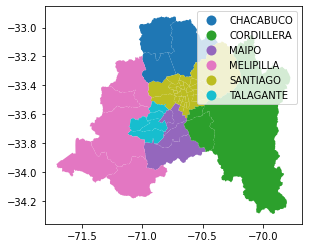

In [ ]:
gdf.plot("NOM_PROVIN", legend = True)

In [ ]:
gdf.explore("NOM_COMUNA", legend = True)